<a href="https://colab.research.google.com/github/Secondths/tugas_mining_salim/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pydotplus
from sklearn import tree
from IPython.display import Image

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')

In [12]:
features = data[['credit_score', 'age']].values  # Ganti dengan kolom fitur yang relevan
target = data['churn'].values  # Ganti dengan kolom target yang sesuai


In [13]:
# Inisialisasi model Decision Tree
decisiontree = DecisionTreeClassifier(
    random_state=0,
    max_depth=3,  # Batasi kedalaman untuk menyederhanakan pohon
    min_samples_split=10,  # Batasi agar pohon tidak terlalu dalam
    min_samples_leaf=5
)

In [14]:
# Train model dengan data yang sudah disesuaikan
model = decisiontree.fit(features, target)


In [15]:
# Contoh observasi untuk prediksi
observation = [[650, 45]]  # Contoh data yang sesuai format fitur yang dipilih
print("Prediction:", model.predict(observation))
print("Prediction probabilities:", model.predict_proba(observation))

Prediction: [0]
Prediction probabilities: [[0.66402379 0.33597621]]


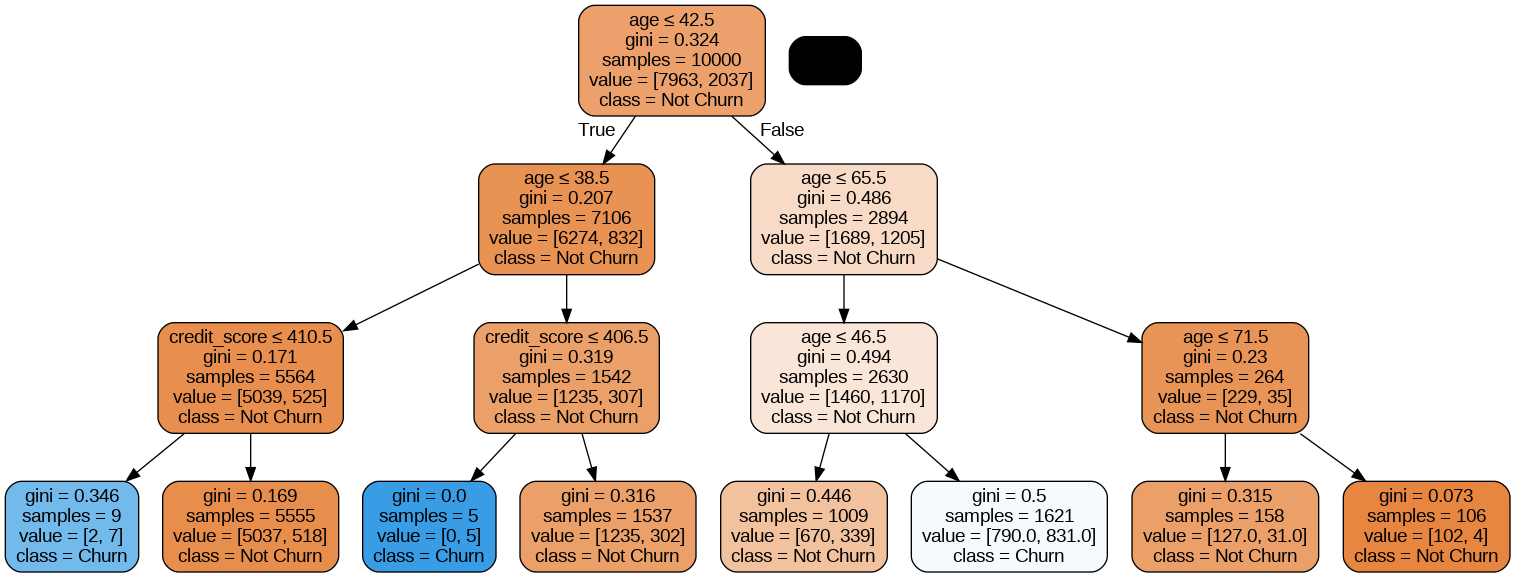

In [16]:
# Visualisasi pohon keputusan menggunakan pydotplus dan Graphviz
dot_data = tree.export_graphviz(
    decisiontree,
    out_file=None,
    feature_names=['credit_score', 'age'],  # Sesuaikan dengan nama kolom fitur
    class_names=['Not Churn', 'Churn'],  # Ganti dengan label yang sesuai jika perlu
    filled=True,
    rounded=True,
    special_characters=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [17]:
# Simpan visualisasi pohon keputusan sebagai file PNG
graph.write_png('churn_tree_visualization.png')


True

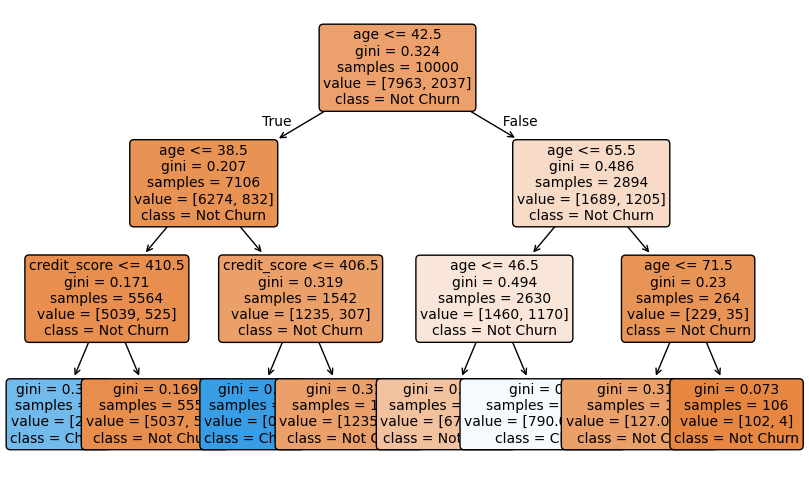

In [18]:
# Visualisasi menggunakan plot_tree
plt.figure(figsize=(10, 6))
plot_tree(
    decisiontree,
    feature_names=['credit_score', 'age'],  # Fitur terbatas
    class_names=['Not Churn', 'Churn'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()